In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

y_ideal = X @ coef

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

def print_metrics(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{name} MSE: {mse:.2f}')
    print(f'{name} R2: {r2:.2f}')

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_lasso, 'Lasso')
print_metrics(y_test, y_pred_ridge, 'Ridge')

Linear Regression MSE: 4311.59
Linear Regression R2: 0.73
Lasso MSE: 171.59
Lasso R2: 0.99
Ridge MSE: 4291.61
Ridge R2: 0.74


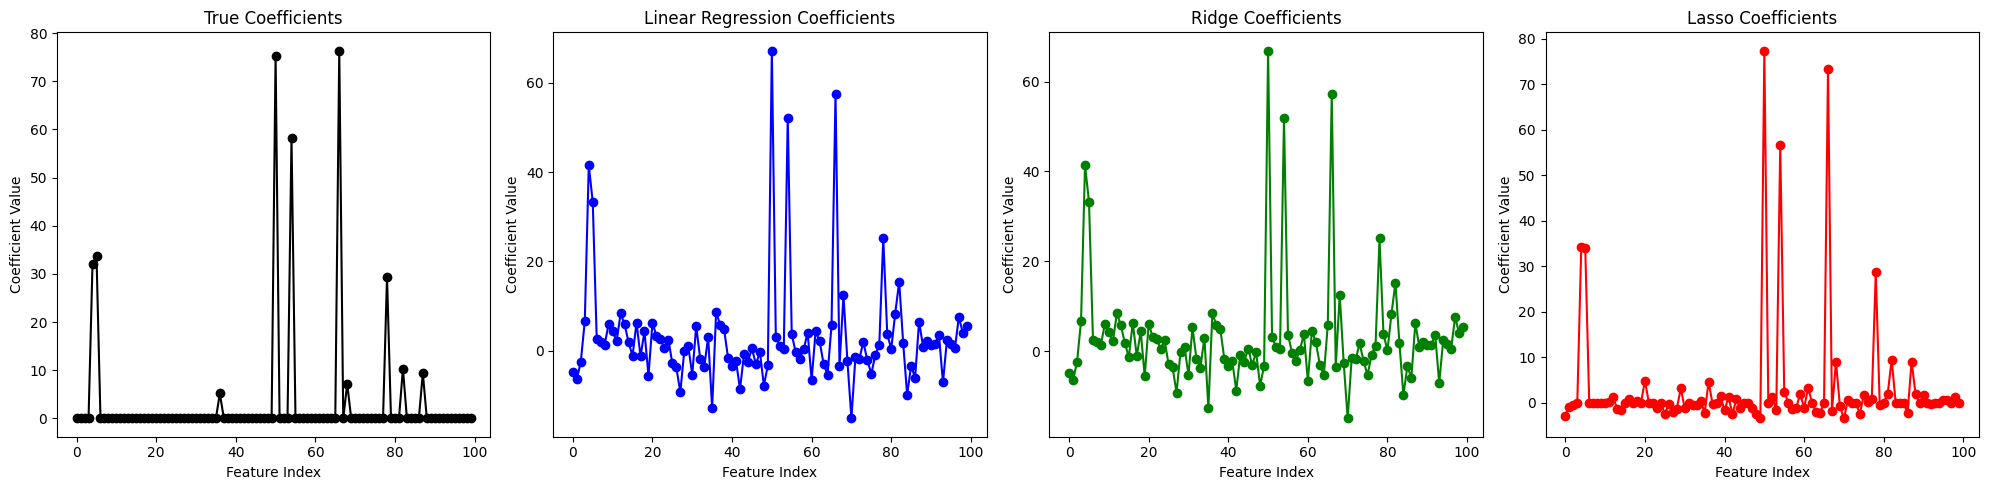

In [48]:
# Plotting coefficients in separate graphs

n_features = 100
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].plot(np.arange(n_features), coef, marker='o', color='black')
axes[0].set_title('True Coefficients')
axes[0].set_xlabel('Feature Index')
axes[0].set_ylabel('Coefficient Value')

axes[1].plot(np.arange(n_features), lr.coef_, marker='o', color='blue')
axes[1].set_title('Linear Regression Coefficients')
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Coefficient Value')

axes[2].plot(np.arange(n_features), ridge.coef_, marker='o', color='green')
axes[2].set_title('Ridge Coefficients')
axes[2].set_xlabel('Feature Index')
axes[2].set_ylabel('Coefficient Value')

axes[3].plot(np.arange(n_features), lasso.coef_, marker='o', color='red')
axes[3].set_title('Lasso Coefficients')
axes[3].set_xlabel('Feature Index')
axes[3].set_ylabel('Coefficient Value')

plt.tight_layout()
plt.show()
